In [1]:
%matplotlib inline


=====================
SVM: Weighted samples
=====================

Plot decision function of a weighted dataset, where the size of points
is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier
puts more emphasis on getting these points right. The effect might often be
subtle.
To emphasize the effect here, we particularly weight outliers, making the
deformation of the decision boundary very visible.


Automatically created module for IPython interactive environment


/home/ishanu/.local/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


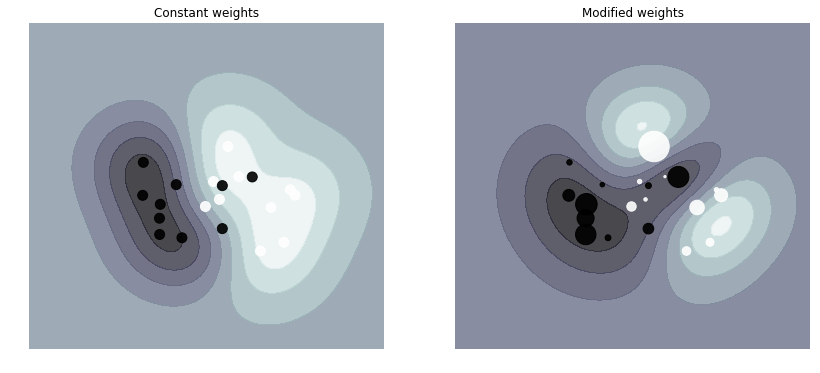

0.8
0.965162281318378


In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

import random as rd
new_random = rd.randint(0,9)

def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone)

    axis.axis('off')
    axis.set_title(title)


# we create 20 points
np.random.seed(new_random)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without class weights

# fit the model
clf_weights = svm.SVC()
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC()
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()
print clf_weights.score(X,y)
print clf_weights.score(X,y,sample_weight=sample_weight_last_ten)
#print clf_no_weights.score


In [3]:
X

array([[ 2.62434536,  0.38824359],
       [ 0.47182825, -0.07296862],
       [ 1.86540763, -1.3015387 ],
       [ 2.74481176,  0.2387931 ],
       [ 1.3190391 ,  0.75062962],
       [ 2.46210794, -1.06014071],
       [ 0.6775828 ,  0.61594565],
       [ 2.13376944, -0.09989127],
       [ 0.82757179,  0.12214158],
       [ 1.04221375,  1.58281521],
       [-1.10061918,  1.14472371],
       [ 0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786],
       [-0.12289023, -0.93576943],
       [-0.26788808,  0.53035547],
       [-0.69166075, -0.39675353],
       [-0.6871727 , -0.84520564],
       [-0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ],
       [ 1.65980218,  0.74204416]])

In [4]:
y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]